In [2]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori,association_rules
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import networkx as nx


# Short/Partial Datasheet

In [11]:
df = pd.read_csv("H-V_short-1.csv")
df

,Node1,Node2
0,YWHAQ,DDR1 /// MIR4640
1,RAF1,RFC2
2,RAF1,HSPA6
3,NRAS,PAX8
4,NRAS,GUCA1A
5,NRAS,MIR5193 /// UBA7
6,MAPK1,THRA
7,MAPK1,PTPN21
8,MAPK1,CCL5
9,MAPK1,CYP2E1


In [12]:
records = []
for i in range(0,50):
    records.append([str(df.values[i, j]) for j in range(0,2)])
records

[['YWHAQ', 'DDR1 /// MIR4640'],
 ['RAF1', 'RFC2'],
 ['RAF1', 'HSPA6'],
 ['NRAS', 'PAX8'],
 ['NRAS', 'GUCA1A'],
 ['NRAS', 'MIR5193 /// UBA7'],
 ['MAPK1', 'THRA'],
 ['MAPK1', 'PTPN21'],
 ['MAPK1', 'CCL5'],
 ['MAPK1', 'CYP2E1'],
 ['MAP2K2', 'EPHB3'],
 ['MAP2K2', 'ESRRA'],
 ['MAP2K2', 'CYP2A6'],
 ['MAP2K2', 'SCARB1'],
 ['MAP2K2', 'TTLL12'],
 ['MAP2K1', 'LINC00152 /// LOC101930489'],
 ['MAP2K1', 'WFDC2'],
 ['MAP2K1', 'MAPK1'],
 ['MAP2K1', 'MAPK1'],
 ['MAP2K1', 'ADAM32'],
 ['MAP2K1', 'SPATA17'],
 ['KRAS', 'PRR22'],
 ['KRAS', 'PRR22'],
 ['KRAS', 'PXK'],
 ['KRAS', 'PXK'],
 ['KRAS', 'VPS18'],
 ['KRAS', 'MSANTD3'],
 ['KRAS', 'SLC46A1'],
 ['IQGAP1', 'SLC46A1'],
 ['IQGAP1', 'TIMD4'],
 ['IQGAP1', 'SLC39A5'],
 ['IQGAP1', 'ZDHHC11 /// ZDHHC11B'],
 ['IQGAP1', 'ATP6V1E2'],
 ['IQGAP1', 'AFG3L1P'],
 ['HRAS', 'CILP2'],
 ['HRAS', 'CILP2'],
 ['HRAS', 'PIGX'],
 ['HRAS', 'TMEM196'],
 ['HRAS', 'SLC39A13'],
 ['HRAS', 'BEST4'],
 ['HRAS', 'AK9'],
 ['HRAS', 'CORO6'],
 ['HRAS', 'TMEM106A'],
 ['BRAF', 'TMEM106A'],
 

In [13]:
df["Node1"].unique()

array(['YWHAQ', 'RAF1', 'NRAS', 'MAPK1', 'MAP2K2', 'MAP2K1', 'KRAS',
       'IQGAP1', 'HRAS', 'BRAF'], dtype=object)

In [14]:
characters =['YWHAQ', 'RAF1', 'NRAS', 'MAPK1', 'MAP2K2', 'MAP2K1', 'KRAS',
       'IQGAP1', 'HRAS', 'BRAF']

edges= [['YWHAQ', 'DDR1 /// MIR4640'],
 ['RAF1', 'RFC2'],
 ['RAF1', 'HSPA6'],
 ['NRAS', 'PAX8'],
 ['NRAS', 'GUCA1A'],
 ['NRAS', 'MIR5193 /// UBA7'],
 ['MAPK1', 'THRA'],
 ['MAPK1', 'PTPN21'],
 ['MAPK1', 'CCL5'],
 ['MAPK1', 'CYP2E1'],
 ['MAP2K2', 'EPHB3'],
 ['MAP2K2', 'ESRRA'],
 ['MAP2K2', 'CYP2A6'],
 ['MAP2K2', 'SCARB1'],
 ['MAP2K2', 'TTLL12'],
 ['MAP2K1', 'LINC00152 /// LOC101930489'],
 ['MAP2K1', 'WFDC2'],
 ['MAP2K1', 'MAPK1'],
 ['MAP2K1', 'MAPK1'],
 ['MAP2K1', 'ADAM32'],
 ['MAP2K1', 'SPATA17'],
 ['KRAS', 'PRR22'],
 ['KRAS', 'PRR22'],
 ['KRAS', 'PXK'],
 ['KRAS', 'PXK'],
 ['KRAS', 'VPS18'],
 ['KRAS', 'MSANTD3'],
 ['KRAS', 'SLC46A1'],
 ['IQGAP1', 'SLC46A1'],
 ['IQGAP1', 'TIMD4'],
 ['IQGAP1', 'SLC39A5'],
 ['IQGAP1', 'ZDHHC11 /// ZDHHC11B'],
 ['IQGAP1', 'ATP6V1E2'],
 ['IQGAP1', 'AFG3L1P'],
 ['HRAS', 'CILP2'],
 ['HRAS', 'CILP2'],
 ['HRAS', 'PIGX'],
 ['HRAS', 'TMEM196'],
 ['HRAS', 'SLC39A13'],
 ['HRAS', 'BEST4'],
 ['HRAS', 'AK9'],
 ['HRAS', 'CORO6'],
 ['HRAS', 'TMEM106A'],
 ['BRAF', 'TMEM106A'],
 ['BRAF', 'ALG10'],
 ['BRAF', 'ALG10'],
 ['BRAF', 'TTC39C'],
 ['BRAF', 'NEXN'],
 ['BRAF', 'C15orf40'],
 ['BRAF', 'RAX2']]

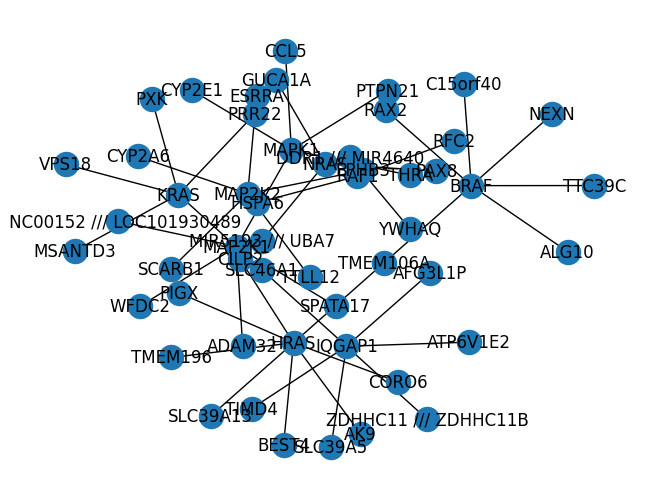

In [15]:
G1= nx.Graph()


G1.add_nodes_from(characters)
G1.add_edges_from(edges)
pos1 = nx.circular_layout(G1)

nx.draw_kamada_kawai(G1, with_labels = True)

In [ ]:
G = nx.from_pandas_edgelist(df, source = 'Node1', target='Node2', edge_attr=None)
pos = nx.circular_layout(G)
nx.draw(G, pos=pos, with_labels = True)

In [23]:
#Animation type graph
'''
from pyvis.network import Network
net=Network(notebook="True")
net.from_nx(G1)
net.show("example.html")
'''

'\nfrom pyvis.network import Network\nnet=Network(notebook="True")\nnet.from_nx(G1)\nnet.show("example.html")\n'

# Complete Datasheet graph

In [3]:
#full length datasheet
df = pd.read_csv("H-V.csv")
df

,Node1,Node2
0,YWHAQ,DDR1 /// MIR4640
1,RAF1,RFC2
2,RAF1,HSPA6
3,NRAS,PAX8
4,NRAS,GUCA1A
...,...,...
2861,RUNX1,FLJ38379
2862,RUNX1,LOC283485
2863,RUNX1,LOC283485
2864,RUNX1,LRRC52


In [4]:
records = []
for i in range(0,2866):
    records.append([str(df.values[i, j]) for j in range(0,2)])
records

[['YWHAQ', 'DDR1 /// MIR4640'],
 ['RAF1', 'RFC2'],
 ['RAF1', 'HSPA6'],
 ['NRAS', 'PAX8'],
 ['NRAS', 'GUCA1A'],
 ['NRAS', 'MIR5193 /// UBA7'],
 ['MAPK1', 'THRA'],
 ['MAPK1', 'PTPN21'],
 ['MAPK1', 'CCL5'],
 ['MAPK1', 'CYP2E1'],
 ['MAP2K2', 'EPHB3'],
 ['MAP2K2', 'ESRRA'],
 ['MAP2K2', 'CYP2A6'],
 ['MAP2K2', 'SCARB1'],
 ['MAP2K2', 'TTLL12'],
 ['MAP2K1', 'LINC00152 /// LOC101930489'],
 ['MAP2K1', 'WFDC2'],
 ['MAP2K1', 'MAPK1'],
 ['MAP2K1', 'MAPK1'],
 ['MAP2K1', 'ADAM32'],
 ['MAP2K1', 'SPATA17'],
 ['KRAS', 'PRR22'],
 ['KRAS', 'PRR22'],
 ['KRAS', 'PXK'],
 ['KRAS', 'PXK'],
 ['KRAS', 'VPS18'],
 ['KRAS', 'MSANTD3'],
 ['KRAS', 'SLC46A1'],
 ['IQGAP1', 'SLC46A1'],
 ['IQGAP1', 'TIMD4'],
 ['IQGAP1', 'SLC39A5'],
 ['IQGAP1', 'ZDHHC11 /// ZDHHC11B'],
 ['IQGAP1', 'ATP6V1E2'],
 ['IQGAP1', 'AFG3L1P'],
 ['HRAS', 'CILP2'],
 ['HRAS', 'CILP2'],
 ['HRAS', 'PIGX'],
 ['HRAS', 'TMEM196'],
 ['HRAS', 'SLC39A13'],
 ['HRAS', 'BEST4'],
 ['HRAS', 'AK9'],
 ['HRAS', 'CORO6'],
 ['HRAS', 'TMEM106A'],
 ['BRAF', 'TMEM106A'],
 

In [5]:
df["Node1"].unique()

array(['YWHAQ', 'RAF1', 'NRAS', 'MAPK1', 'MAP2K2', 'MAP2K1', 'KRAS',
       'IQGAP1', 'HRAS', 'BRAF', 'RIMKLA', 'NAT8L', 'KLK3', 'FOLH1',
       'FLNA', 'ASPA', 'ALB', 'TP53', 'RBBP8', 'RAD51', 'FAM175A',
       'CSTF1', 'BRCC3', 'BRCA2', 'BRCA1', 'BARD1', 'PALB2', 'FANCI',
       'FANCG', 'FANCD2', 'ATM', 'TOPBP1', 'NBN', 'BRIP1', 'BABAM1',
       'PDCD1LG2', 'PDCD1', 'HOXD13', 'HLA-DRA', 'CTLA4', 'CD80', 'CD4',
       'CD3E', 'CD274', 'CD247', 'PIK3R3', 'PIK3R2', 'PIK3R1', 'PIK3CA',
       'IRS1', 'ERBB3', 'EGFR', 'AKT1', 'NRG1', 'HSP90AA1', 'GRB7',
       'GRB2', 'ERBB2IP', 'ERBB2', 'EGF', 'CTNNB1', 'CD44', 'TIMP3',
       'TIMP2', 'TIMP1', 'THBS2', 'TGFB1', 'STAT3', 'MMP2', 'LCN2', 'DCN',
       'COL18A1', 'PLG', 'MMP9', 'MMP1', 'IL6', 'FGF2', 'BSG', 'ACAN',
       'SPARC', 'PAPLN', 'ERBB4', 'COL3A1', 'COL1A2', 'COL1A1', 'BGLAP',
       'IL5', 'IL4R', 'IL4', 'IL19', 'IL13RA2', 'IL13', 'IL10', 'IFNG',
       'CHI3L1', 'RAPGEF6', 'RAPGEF2', 'RAP2A', 'RAP1B', 'RAP1A',
       'PTPN13',

In [6]:
characters =['YWHAQ', 'RAF1', 'NRAS', 'MAPK1', 'MAP2K2', 'MAP2K1', 'KRAS',
       'IQGAP1', 'HRAS', 'BRAF', 'RIMKLA', 'NAT8L', 'KLK3', 'FOLH1',
       'FLNA', 'ASPA', 'ALB', 'TP53', 'RBBP8', 'RAD51', 'FAM175A',
       'CSTF1', 'BRCC3', 'BRCA2', 'BRCA1', 'BARD1', 'PALB2', 'FANCI',
       'FANCG', 'FANCD2', 'ATM', 'TOPBP1', 'NBN', 'BRIP1', 'BABAM1',
       'PDCD1LG2', 'PDCD1', 'HOXD13', 'HLA-DRA', 'CTLA4', 'CD80', 'CD4',
       'CD3E', 'CD274', 'CD247', 'PIK3R3', 'PIK3R2', 'PIK3R1', 'PIK3CA',
       'IRS1', 'ERBB3', 'EGFR', 'AKT1', 'NRG1', 'HSP90AA1', 'GRB7',
       'GRB2', 'ERBB2IP', 'ERBB2', 'EGF', 'CTNNB1', 'CD44', 'TIMP3',
       'TIMP2', 'TIMP1', 'THBS2', 'TGFB1', 'STAT3', 'MMP2', 'LCN2', 'DCN',
       'COL18A1', 'PLG', 'MMP9', 'MMP1', 'IL6', 'FGF2', 'BSG', 'ACAN',
       'SPARC', 'PAPLN', 'ERBB4', 'COL3A1', 'COL1A2', 'COL1A1', 'BGLAP',
       'IL5', 'IL4R', 'IL4', 'IL19', 'IL13RA2', 'IL13', 'IL10', 'IFNG',
       'CHI3L1', 'RAPGEF6', 'RAPGEF2', 'RAP2A', 'RAP1B', 'RAP1A',
       'PTPN13', 'MRAS', 'MLLT4', 'MAGI3', 'MAGI1', 'F11R', 'UPB1',
       'GAD2', 'DPYS', 'DPYD', 'ALDH9A1', 'ALDH3B2', 'ALDH3A2', 'ALDH2',
       'ALDH1B1', 'AGXT2', 'ABAT', 'WBP4', 'WBP11', 'PRPF19', 'PQBP1',
       'PPP1CC', 'PPP1CA', 'PLRG1', 'CWC15', 'CTNNBL1', 'CDC5L', 'BCAS2',
       'POLR3K', 'POLR3F', 'POLR3E', 'POLR3D', 'POLR3B', 'POLR3A',
       'POLR2L', 'POLR2H', 'POLR2F', 'POLR2E', 'POLR1C', 'UBE3A', 'SIRT1',
       'RPA1', 'MDM2', 'EP300', 'DDX5', 'CREBBP', 'CDK2', 'AURKA', 'MUC1',
       'TTN', 'STIP1', 'MMP23B', 'AGR2', 'DAB2', 'BASP1', 'S100B', 'MIA',
       'CSF3R', 'CSF3', 'BCL2L1', 'KEAP1', 'EWSR1', 'KAT6A', 'CRKL',
       'MLLT3', 'BAG1', 'INSM1', 'ETV6', 'PICK1', 'SPINK7', 'ANKS1A',
       'LMO4', 'DEFB106B', 'DEFB106A', 'DMTF1', 'CXCR1', 'AMFR', 'BCL6',
       'S100A4', 'CBFA2T2', 'NPM1', 'HIST3H3', 'RUNX1']
edges = [['YWHAQ', 'DDR1 /// MIR4640'],
 ['RAF1', 'RFC2'],
 ['RAF1', 'HSPA6'],
 ['NRAS', 'PAX8'],
 ['NRAS', 'GUCA1A'],
 ['NRAS', 'MIR5193 /// UBA7'],
 ['MAPK1', 'THRA'],
 ['MAPK1', 'PTPN21'],
 ['MAPK1', 'CCL5'],
 ['MAPK1', 'CYP2E1'],
 ['MAP2K2', 'EPHB3'],
 ['MAP2K2', 'ESRRA'],
 ['MAP2K2', 'CYP2A6'],
 ['MAP2K2', 'SCARB1'],
 ['MAP2K2', 'TTLL12'],
 ['MAP2K1', 'LINC00152 /// LOC101930489'],
 ['MAP2K1', 'WFDC2'],
 ['MAP2K1', 'MAPK1'],
 ['MAP2K1', 'MAPK1'],
 ['MAP2K1', 'ADAM32'],
 ['MAP2K1', 'SPATA17'],
 ['KRAS', 'PRR22'],
 ['KRAS', 'PRR22'],
 ['KRAS', 'PXK'],
 ['KRAS', 'PXK'],
 ['KRAS', 'VPS18'],
 ['KRAS', 'MSANTD3'],
 ['KRAS', 'SLC46A1'],
 ['IQGAP1', 'SLC46A1'],
 ['IQGAP1', 'TIMD4'],
 ['IQGAP1', 'SLC39A5'],
 ['IQGAP1', 'ZDHHC11 /// ZDHHC11B'],
 ['IQGAP1', 'ATP6V1E2'],
 ['IQGAP1', 'AFG3L1P'],
 ['HRAS', 'CILP2'],
 ['HRAS', 'CILP2'],
 ['HRAS', 'PIGX'],
 ['HRAS', 'TMEM196'],
 ['HRAS', 'SLC39A13'],
 ['HRAS', 'BEST4'],
 ['HRAS', 'AK9'],
 ['HRAS', 'CORO6'],
 ['HRAS', 'TMEM106A'],
 ['BRAF', 'TMEM106A'],
 ['BRAF', 'ALG10'],
 ['BRAF', 'ALG10'],
 ['BRAF', 'TTC39C'],
 ['BRAF', 'NEXN'],
 ['BRAF', 'C15orf40'],
 ['BRAF', 'RAX2'],
 ['BRAF', 'MFAP3'],
 ['BRAF', 'EYA3'],
 ['BRAF', 'GIMAP1'],
 ['RIMKLA', 'GIMAP1'],
 ['NAT8L', 'GIMAP1'],
 ['NAT8L', 'KLK8'],
 ['KLK3', 'CCDC65'],
 ['FOLH1', 'CCDC65'],
 ['FOLH1', 'FAM122C'],
 ['FOLH1', 'FAM122C'],
 ['FOLH1', 'CCDC11'],
 ['FOLH1', 'CCDC11'],
 ['FOLH1', 'ARMCX4'],
 ['FOLH1', 'RBBP6'],
 ['FLNA', 'CENPBD1'],
 ['ASPA', 'TRIOBP'],
 ['ASPA', 'TRIOBP'],
 ['ASPA', 'CATSPER1'],
 ['ASPA', 'HOXD4'],
 ['ALB', 'GSC'],
 ['ALB', 'SP7'],
 ['ALB', 'PDE7A'],
 ['TP53', 'CNOT7'],
 ['TP53', 'CRYZL1'],
 ['RBBP8', 'PRSS33'],
 ['RBBP8', 'PRSS33'],
 ['RAD51', 'C19orf26'],
 ['RAD51', 'C19orf26'],
 ['RAD51', 'MCMDC2'],
 ['FAM175A', 'TIRAP'],
 ['FAM175A', 'LEAP2'],
 ['FAM175A', 'MSI2'],
 ['CSTF1', 'SCIN'],
 ['BRCC3', 'SCIN'],
 ['BRCC3', 'CTCFL'],
 ['BRCC3', 'C4orf33'],
 ['BRCC3', 'C4orf33'],
 ['BRCC3', 'C4orf33'],
 ['BRCA2', 'ZNF333'],
 ['BRCA2', 'TVP23C'],
 ['BRCA2', 'RDH10'],
 ['BRCA2', 'RDH10'],
 ['BRCA2', 'SRSF12'],
 ['BRCA2', 'FAM71A'],
 ['BRCA1', 'FAM71A'],
 ['BRCA1', 'GAPT'],
 ['BRCA1', 'FLJ30901 /// SCUBE1'],
 ['BRCA1', 'ERICH5'],
 ['BRCA1', 'ERICH5'],
 ['BRCA1', 'CCDC185'],
 ['BRCA1', 'ENTHD1'],
 ['BRCA1', 'ENTHD1'],
 ['BRCA1', 'TSSK3'],
 ['BARD1', 'WFDC6'],
 ['BARD1', 'CLEC12A'],
 ['BARD1', 'BRF1'],
 ['BARD1', 'C15orf27'],
 ['BARD1', 'BACH1 /// GRIK1-AS2'],
 ['BARD1', 'CALML6'],
 ['BARD1', 'NLRP5'],
 ['BARD1', 'ODF4'],
 ['BARD1', 'ODF4'],
 ['BARD1', 'CLEC4F'],
 ['RAD51', 'DEFB106A /// DEFB106B'],
 ['RAD51', 'DEFB106A /// DEFB106B'],
 ['PALB2', 'WFDC9'],
 ['PALB2', 'WFDC9'],
 ['PALB2', 'NEDD1'],
 ['FANCI', 'TTLL10'],
 ['FANCI', 'TTLL10'],
 ['FANCI', 'CALR3'],
 ['FANCG', 'C10orf25'],
 ['FANCG', 'ETV3'],
 ['FANCG', 'KLHL10'],
 ['FANCG', 'KLHL10'],
 ['FANCD2', 'TM2D3'],
 ['FANCD2', 'ZNF485'],
 ['FANCD2', 'WDR17'],
 ['FANCD2', 'MFSD6L'],
 ['FANCD2', 'CDH23 /// LOC100653137'],
 ['FANCD2', 'ANKAR'],
 ['BRCA2', 'MEGF11'],
 ['BRCA2', 'GPR182'],
 ['BRCA2', 'ESX1'],
 ['BRCA2', 'C8orf12'],
 ['BRCA2', 'LOC653486 /// SCGB1C1'],
 ['BRCA2', 'DNAJC5G'],
 ['BRCA2', 'WDR88'],
 ['BRCA1', 'WDR88'],
 ['BRCA1', 'PRUNE2'],
 ['BRCA1', 'MBD3L2'],
 ['BRCA1', 'ADAMTSL1'],
 ['BRCA1', 'MBD3L1'],
 ['BRCA1', 'MBD3L1'],
 ['BRCA1', 'FAM46D'],
 ['BRCA1', 'SERPINB11'],
 ['BARD1', 'LINC00161'],
 ['BARD1', 'DSCR10'],
 ['BARD1', 'DSCR10'],
 ['BARD1', 'ABHD11'],
 ['BARD1', 'ACAP2'],
 ['BARD1', 'GAMT'],
 ['BARD1', 'GAMT'],
 ['BARD1', 'PLCD3'],
 ['ATM', 'IRF6'],
 ['ATM', 'IRF6'],
 ['ATM', 'PTPRC'],
 ['ATM', 'MAN1A2'],
 ['ATM', 'RAPH1'],
 ['ATM', 'SMCR8'],
 ['ATM', 'LACTB'],
 ['ATM', 'LACTB'],
 ['ATM', 'BNC1'],
 ['TP53', 'MPP4'],
 ['TOPBP1', 'LACE1'],
 ['PALB2', 'IDI2'],
 ['PALB2', 'CYP11B1'],
 ['NBN', 'TAF8'],
 ['NBN', 'COBL'],
 ['NBN', 'SLAMF6'],
 ['FANCD2', 'ZSCAN20'],
 ['FANCD2', 'ZSCAN20'],
 ['FANCD2', 'GPBAR1'],
 ['FANCD2', 'RHBDL2'],
 ['BRIP1', 'FRAS1'],
 ['BRIP1', 'BRSK1'],
 ['BRIP1', 'CRB2'],
 ['BRIP1', 'KCNE4'],
 ['BRIP1', 'KCNE4'],
 ['BRCA1', 'CD300LG'],
 ['BRCA1', 'SLC34A3'],
 ['BRCA1', 'CPA6'],
 ['BRCA1', 'WBP2NL'],
 ['BRCA1', 'HIPK1'],
 ['BRCA1', 'HIPK1'],
 ['BRCA1', 'MTBP'],
 ['BARD1', 'ACVR1C'],
 ['BARD1', 'TMEM74'],
 ['BARD1', 'TMEM74'],
 ['BARD1', 'TIGD4'],
 ['BARD1', 'TIGD4'],
 ['BARD1', 'ART5'],
 ['BARD1', 'FAM71C'],
 ['BARD1', 'C21orf67'],
 ['BABAM1', 'NLRP11'],
 ['BABAM1', 'ATP6V1C2'],
 ['BABAM1', 'CLDN19'],
 ['BABAM1', 'VTI1A'],
 ['BABAM1', 'KIF6'],
 ['ATM', 'IQCD'],
 ['ATM', 'TAGAP'],
 ['ATM', 'TAGAP'],
 ['ATM', 'STON2'],
 ['ATM', 'SERPINA12'],
 ['ATM', 'LETM2'],
 ['ATM', 'BSND'],
 ['ATM', 'BSND'],
 ['ATM', 'CLEC4C'],
 ['PDCD1LG2', 'NLRC4'],
 ['PDCD1', 'NLRC4'],
 ['PDCD1', 'PRSS36'],
 ['HOXD13', 'ZDHHC15'],
 ['HOXD13', 'RAI1'],
 ['HLA-DRA', 'CDK15'],
 ['HLA-DRA', 'ZNF570'],
 ['HLA-DRA', 'AF131215.4'],
 ['CTLA4', 'NUDT9P1'],
 ['CTLA4', 'BTBD16'],
 ['CTLA4', 'RTP3'],
 ['CD80', 'RTP3'],
 ['CD80', 'TSPEAR'],
 ['CD80', 'MIPOL1'],
 ['CD80', 'MIPOL1'],
 ['CD80', 'C6orf141'],
 ['CD4', 'ALMS1P'],
 ['CD4', 'MYO3B'],
 ['CD4', 'ADAM21'],
 ['CD4', 'TRIML2'],
 ['CD4', 'ABCC13'],
 ['CD4', 'ABCC13'],
 ['CD3E', 'IL12RB1'],
 ['CD3E', 'GTF2A1L'],
 ['CD3E', 'TRPV3'],
 ['CD3E', 'CNBD1'],
 ['CD3E', 'CNBD1'],
 ['CD3E', 'ABCC12'],
 ['CD3E', 'MMP21'],
 ['CD274', 'TMEM190'],
 ['CD274', 'GAS2L2'],
 ['CD274', 'KCNG4'],
 ['CD274', 'PXT1'],
 ['CD274', 'CACNG5'],
 ['CD274', 'LINC00308'],
 ['CD274', 'LINC00308'],
 ['CD274', 'FAM223A /// FAM223B'],
 ['CD274', 'WFDC11'],
 ['CD247', 'IFNL2 /// IFNL3'],
 ['CD247', 'JAK1'],
 ['CD247', 'JAK1'],
 ['CD247', 'CDC42SE2'],
 ['CD247', 'CDC42SE2'],
 ['CD247', 'ACACB'],
 ['CD247', 'ACACB'],
 ['CD247', 'RFWD2'],
 ['CD247', 'STX6'],
 ['PIK3R3', 'ANLN'],
 ['PIK3R2', 'SPRR4'],
 ['PIK3R2', 'POLR2J /// POLR2J2 /// POLR2J3 /// UPK3BL'],
 ['PIK3R1', 'LOC441259 /// POLR2J /// POLR2J2 /// POLR2J3 /// UPK3BL'],
 ['PIK3R1', 'HSH2D'],
 ['PIK3R1', 'TRNT1'],
 ['PIK3CA', 'TMEM163'],
 ['PIK3CA', 'ARHGAP5'],
 ['PIK3CA', 'HERPUD2'],
 ['PIK3CA', 'JMJD6'],
 ['KRAS', 'SRCAP'],
 ['KRAS', 'MAP3K6'],
 ['KRAS', 'ARSG'],
 ['KRAS', 'ZNF101'],
 ['KRAS', 'ZNF101'],
 ['IRS1', 'PTPN11'],
 ['IRS1', 'KLHDC7B'],
 ['IRS1', 'ATAD3A /// ATAD3B'],
 ['IRS1', 'ZNF626'],
 ['IRS1', 'PHC3'],
 ['IRS1', 'IL11RA'],
 ['HRAS', 'TNFRSF10A'],
 ['HRAS', 'RAD51L3-RFFL /// RFFL'],
 ['HRAS', 'RAD51L3-RFFL /// RFFL'],
 ['HRAS', 'HPS4'],
 ['HRAS', 'UHMK1'],
 ['HRAS', 'TXNDC2'],
 ['HRAS', 'NAV3'],
 ['ERBB3', 'C5orf22'],
 ['ERBB3', 'PCDHGB7'],
 ['ERBB3', 'PCDHGB7'],
 ['ERBB3', 'ERC1'],
 ['ERBB3', 'FLCN'],
 ['ERBB3', 'JMJD1C-AS1'],
 ['ERBB3', 'LRRC7'],
 ['ERBB3', 'SH2D3C'],
 ['EGFR', 'PPP1R3B'],
 ['EGFR', 'PPP1R3B'],
 ['EGFR', 'SLC9A7'],
 ['EGFR', 'IGSF3'],
 ['EGFR', 'RFX6'],
 ['EGFR', 'DIRC1'],
 ['EGFR', 'DNAJB7'],
 ['EGFR', 'UCN3'],
 ['EGFR', 'DIP2A'],
 ['AKT1', 'USP28'],
 ['AKT1', 'CASC5'],
 ['AKT1', 'CASC5'],
 ['AKT1', 'SENP8'],
 ['AKT1', 'GRHL1'],
 ['AKT1', 'CNBD2'],
 ['AKT1', 'CNBD2'],
 ['AKT1', 'CASKIN1'],
 ['AKT1', 'CACNA2D4'],
 ['AKT1', 'ARL11'],
 ['NRG1', 'ARL11'],
 ['HSP90AA1', 'SLC2A13'],
 ['HSP90AA1', 'SLC2A13'],
 ['GRB7', 'NIPA1'],
 ['GRB7', 'TUBA3FP'],
 ['GRB2', 'CARD16'],
 ['GRB2', 'CARD16 /// CASP1'],
 ['GRB2', 'DUSP19'],
 ['GRB2', 'DUSP19'],
 ['ERBB2IP', 'CYB5D1'],
 ['ERBB2IP', 'NMNAT2'],
 ['ERBB2IP', 'SLC4A1'],
 ['ERBB2IP', 'CREG2'],
 ['ERBB2', 'RXFP1'],
 ['ERBB2', 'SPEF2'],
 ['ERBB2', 'CEP170 /// CEP170P1'],
 ['ERBB2', 'DTD1'],
 ['ERBB2', 'CASC4'],
 ['ERBB2', 'FGF1'],
 ['EGFR', 'ARPP21'],
 ['EGFR', 'RHOXF1'],
 ['EGFR', 'ADAMTS17'],
 ['EGFR', 'ADAMTS17'],
 ['EGFR', 'ADAMTS17'],
 ['EGFR', 'SNHG7 /// SNORA17 /// SNORA43'],
 ['EGFR', 'DHH'],
 ['EGF', 'ABRA'],
 ['EGF', 'ABRA'],
 ['EGF', 'KLHDC1'],
 ['EGF', 'RICTOR'],
 ['EGF', 'PCDHGA4'],
 ['EGF', 'NETO1'],
 ['EGF', 'WWP2'],
 ['CTNNB1', 'ST7L'],
 ['CTNNB1', 'ST7L'],
 ['CTNNB1', 'C2orf15'],
 ['CTNNB1', 'KCNH8'],
 ['CTNNB1', 'MCF2L'],
 ['CTNNB1', 'SLCO6A1'],
 ['CTNNB1', 'PP2D1'],
 ['CD44', 'KLC3'],
 ['CD44', 'CIB3'],
 ['CD44', 'CIB3'],
 ['CD44', 'CADM2'],
 ['CD44', 'CADM2'],
 ['CD44', 'C9orf66'],
 ['TIMP3', 'C9orf66'],
 ['TIMP2', 'HDAC9'],
 ['TIMP2', 'HDAC9'],
 ['TIMP1', 'SLC16A11'],
 ['THBS2', 'TMEM67'],
 ['THBS2', 'TMEM67'],
 ['THBS2', 'HS6ST2'],
 ['THBS2', 'HS6ST2'],
 ['TGFB1', 'CAMKK1'],
 ['TGFB1', 'ZNF625'],
 ['TGFB1', 'ZNF563'],
 ['TGFB1', 'LIN9'],
 ['STAT3', 'CLEC4D'],
 ['STAT3', 'CLEC4D'],
 ['STAT3', 'SLC25A27'],
 ['MMP2', 'GPRC6A'],
 ['MMP2', 'RAET1E'],
 ['MMP2', 'SLC44A5'],
 ['MMP2', 'SLC44A5'],
 ['MMP2', 'ZNF417'],
 ['MMP2', 'ZNF781'],
 ['MMP2', 'HELB'],
 ['LCN2', 'HELB'],
 ['LCN2', 'SEC62'],
 ['LCN2', 'SEC62'],
 ['LCN2', 'TRDN'],
 ['LCN2', 'SOCS4'],
 ['LCN2', 'C8orf31'],
 ['DCN', 'ZNF547'],
 ['DCN', 'SIM1'],
 ['DCN', 'PROM2'],
 ['DCN', 'TLR4'],
 ['DCN', 'TSNARE1'],
 ['DCN', 'ABHD11'],
 ['DCN', 'CAPN13'],
 ['COL18A1', 'STMN1'],
 ['COL18A1', 'TIRAP'],
 ['COL18A1', 'SIGLEC10'],
 ['COL18A1', 'SIGLEC10'],
 ['COL18A1', 'ADAMTSL1'],
 ['COL18A1', 'RFX4'],
 ['COL18A1', 'WFIKKN1'],
 ['TIMP1', 'SENP1'],
 ['TGFB1', 'KLF14'],
 ['TGFB1', 'KLF14'],
 ['STAT3', 'NXNL2'],
 ['STAT3', 'BRS3'],
 ['STAT3', 'LINC00205 /// LOC102723489 /// LOC102725097'],
 ['PLG', 'TMX3'],
 ['PLG', 'ZNF396'],
 ['PLG', 'SLC26A7'],
 ['PLG', 'SLC26A7'],
 ['MMP9', 'SNX18'],
 ['MMP9', 'FBXO39'],
 ['MMP9', 'B3GNT6'],
 ['MMP9', 'B3GNT6'],
 ['MMP9', 'DENND1B'],
 ['MMP1', 'ZNF619'],
 ['MMP1', 'ICK'],
 ['MMP1', 'FAM71D'],
 ['MMP1', 'BCL2L14'],
 ['MMP1', 'HS6ST3'],
 ['MMP1', 'SLC26A1'],
 ['IL6', 'CLDN15'],
 ['IL6', 'RAB42'],
 ['IL6', 'PTCHD1'],
 ['IL6', 'M1AP'],
 ['IL6', 'ZSCAN4'],
 ['IL6', 'ZSCAN4'],
 ['IL6', 'VWA5B1'],
 ['FGF2', 'VWA5B1'],
 ['FGF2', 'LINC00311'],
 ['FGF2', 'HTR6'],
 ['FGF2', 'MAGEB6'],
 ['FGF2',
  'LOC101060464 /// LOC101929858 /// LOC101930165 /// LOC101930171 /// TCEB3C /// TCEB3CL /// TCEB3CL2'],
 ['FGF2', 'RUSC1-AS1'],
 ['FGF2', 'CACNG6'],
 ['FGF2', 'LMNTD1'],
 ['BSG', 'CIRBP-AS1'],
 ['BSG', 'AXDND1'],
 ['BSG', 'ASMTL-AS1'],
 ['BSG', 'ASMTL-AS1'],
 ['BSG', 'CD200R1'],
 ['BSG', 'LINC00334'],
 ['ACAN', 'LINC00334'],
 ['ACAN', 'ATOH7'],
 ['ACAN', 'ATOH7'],
 ['ACAN', 'SEC16B'],
 ['ACAN', 'AMER1'],
 ['ACAN', 'NKX6-3'],
 ['ACAN', 'NKX6-3'],
 ['SPARC', 'TBATA'],
 ['PAPLN', 'EXOC3L2'],
 ['MMP2', 'CABP4'],
 ['MMP2', 'TNFRSF13C'],
 ['ERBB4', 'CAMK2N2'],
 ['DCN', 'ANKRD30BP2'],
 ['DCN', 'KCNG3'],
 ['DCN', 'KCNG3'],
 ['DCN', 'LINC01312'],
 ['COL3A1', 'LINC01312'],
 ['COL3A1', 'FOXP2'],
 ['COL3A1', 'B4GALNT2'],
 ['COL3A1', 'NETO1'],
 ['COL1A2', 'FMR1NB'],
 ['COL1A2', 'GCSAML'],
 ['COL1A2', 'SIGLEC11'],
 ['COL1A2', 'SIGLEC11'],
 ['COL1A2', 'IL23R'],
 ['COL1A1', 'MAGEB18'],
 ['COL1A1', 'CD276'],
 ['COL1A1', 'IFNL2'],
 ['COL1A1', 'IFNL1'],
 ['COL1A1', 'C4orf36'],
 ['COL1A1', 'FIGNL1'],
 ['BGLAP', 'RIMS1'],
 ['BGLAP', 'PITPNM2'],
 ['BGLAP', 'PITPNM2'],
 ['BGLAP', 'PCDH10'],
 ['BGLAP', 'TAB3'],
 ['BGLAP', 'TAB3'],
 ['ALB', 'GRK7'],
 ['ALB', 'MMEL1'],
 ['ALB', 'PDE8A'],
 ['ALB', 'NLRP6'],
 ['ALB', 'AKNAD1'],
 ['ALB', 'ZCCHC5'],
 ['ALB', 'ATRIP /// TREX1'],
 ['IL5', 'ZIC5'],
 ['IL4R', 'ANGPT1'],
 ['IL4R', 'TEDDM1'],
 ['IL4', 'LOC149373'],
 ['IL4', 'GABRG1'],
 ['IL4', 'PANX2'],
 ['IL19', 'ZNF114'],
 ['IL19', 'ZNF114'],
 ['IL19', 'CCDC27'],
 ['IL19', 'C15orf26'],
 ['IL13RA2', 'LOC100652931 /// RBMY2FP'],
 ['IL13RA2', 'NEUROD2'],
 ['IL13RA2', 'C5orf17'],
 ['IL13RA2', 'LINC00208'],
 ['IL13RA2', 'DNAH6'],
 ['IL13RA2', 'LRRC15'],
 ['IL13', 'TTC40'],
 ['IL13', 'B3GNT7'],
 ['IL13', 'ZNF645'],
 ['IL13', 'ZMYM6'],
 ['IL13', 'ZMYM6'],
 ['IL13', 'SGCZ'],
 ['IL13', 'LOC100507431'],
 ['IL10', 'WNT9B'],
 ['IL10', 'CNPY3'],
 ['IL10', 'SCAMP1'],
 ['IL10', 'LINC00471'],
 ['IL10', 'HAS3'],
 ['IL10', 'FGF4'],
 ['IL10', 'SLC30A8'],
 ['IFNG', 'LOC142937'],
 ['IFNG', 'LOC439933'],
 ['IFNG', 'C11orf65'],
 ['IFNG', 'FAM71E2'],
 ['IFNG', 'OR5P2'],
 ['IFNG', 'DYDC1'],
 ['IFNG', 'IL27'],
 ['IFNG', 'IQCF1'],
 ['CHI3L1', 'DEFB125'],
 ['CHI3L1', 'WFDC10B'],
 ['CHI3L1', 'DEFB105A /// DEFB105B'],
 ['CHI3L1', 'PKHD1'],
 ['CHI3L1', 'PKD1L1'],
 ['RAPGEF6', 'GPR112'],
 ['RAPGEF6', 'TENM1'],
 ['RAPGEF6', 'REXO1L1P'],
 ['RAPGEF6', 'TAF1L'],
 ['RAPGEF6', 'CNTNAP5'],
 ['RAPGEF6', 'RECQL4'],
 ['RAPGEF6', 'GPR113'],
 ['RAPGEF6', 'TMC2'],
 ['RAPGEF6', 'SMCR5'],
 ['RAPGEF6', 'BICD2'],
 ['RAPGEF2', 'ZIM3'],
 ['RAPGEF2', 'NOX5'],
 ['RAPGEF2', 'DAOA-AS1'],
 ['RAPGEF2', 'GPR126'],
 ['RAPGEF2', 'KLHL4'],
 ['RAPGEF2', 'GPR156'],
 ['RAPGEF2', 'SUOX'],
 ['RAPGEF2', 'GPR115'],
 ['RAP2A', 'IL31RA'],
 ['RAP2A', 'SYTL5'],
 ['RAP2A', 'SDCCAG8'],
 ['RAP1B', 'GPR111'],
 ['RAP1B', 'SYN2'],
 ['RAP1B', 'ASB10'],
 ['RAP1B', 'HTR3C'],
 ['RAP1A', 'NFKBID'],
 ['RAP1A', 'CD300LF'],
 ['RAP1A', 'GJA10'],
 ['RAP1A', 'WNT9A'],
 ['PTPN13', 'GAL3ST2'],
 ['MRAS', 'PIP4K2B'],
 ['MRAS', 'PIP4K2B'],
 ['MRAS', 'ODF3'],
 ['MLLT4', 'WFDC13'],
 ['MLLT4', 'LINC00521'],
 ['MLLT4', 'SLFN5'],
 ['MLLT4', 'SERPINB12'],
 ['MLLT4', 'GIPC3'],
 ['MLLT4', 'PGLYRP3'],
 ['MLLT4', 'PSKH2'],
 ['MLLT4', 'OR6W1P'],
 ['MAGI3', 'MOGAT1'],
 ['MAGI3', 'GPR78'],
 ['MAGI3', 'H1FOO'],
 ['MAGI3', 'TAAR9'],
 ['MAGI1', 'GNRHR2'],
 ['MAGI1', 'MYOZ3'],
 ['MAGI1', 'MYOZ3'],
 ['F11R', 'BNIPL'],
 ['F11R', 'ASB11'],
 ['RAPGEF6', 'OFCC1'],
 ['RAPGEF6', 'OFCC1'],
 ['RAPGEF6', 'SDR9C7'],
 ['RAPGEF6', 'OR5P3'],
 ['RAPGEF6', 'TRIM40'],
 ['RAPGEF6', 'CSN1S2AP'],
 ['RAPGEF6', 'WFDC12'],
 ['RAPGEF6', 'CRYGN'],
 ['RAPGEF6', 'STARD6'],
 ['RAPGEF6', 'C11orf40'],
 ['RAPGEF2', 'C18orf12'],
 ['RAPGEF2', 'BCL2L11'],
 ['RAPGEF2', 'WFDC2'],
 ['RAPGEF2', 'DEFB119'],
 ['RAPGEF2', 'FLJ45513 /// TAC4'],
 ['RAPGEF2', 'BCL2L11'],
 ['RAPGEF2', 'TIGD1'],
 ['RAPGEF2', 'ALKBH5'],
 ['RAP2A', 'CCDC69'],
 ['RAP2A', 'NFX1'],
 ['RAP2A', 'DSG2'],
 ['RAP1B', 'C5orf24'],
 ['RAP1B', 'C5orf24'],
 ['RAP1B', 'C5orf24'],
 ['RAP1B', 'KBTBD6'],
 ['RAP1A', 'CDK8'],
 ['RAP1A', 'CDK8'],
 ['RAP1A', 'PTK6'],
 ['RAP1A', 'NKD1'],
 ['PTPN13', 'STK38'],
 ['MRAS', 'THEM4'],
 ['MRAS', 'CLSPN'],
 ['MRAS', 'RBAK'],
 ['MLLT4', 'WDR62'],
 ['MLLT4', 'WDR62'],
 ['MLLT4', 'SLC39A12'],
 ['MLLT4', 'RNF168'],
 ['MLLT4', 'SVEP1'],
 ['MLLT4', 'LOC652276'],
 ['MLLT4', 'GATA4'],
 ['MLLT4', 'TC2N'],
 ['MAGI3', 'C9orf72'],
 ['MAGI3', 'C9orf72'],
 ['MAGI3', 'KCTD18'],
 ['MAGI3', 'KLF11'],
 ['MAGI1', 'ANKLE1'],
 ['MAGI1', 'PLXNA3'],
 ['MAGI1', 'PELO'],
 ['F11R', 'LACC1'],
 ['F11R', 'LACC1'],
 ['UPB1', 'TAPT1-AS1'],
 ['UPB1', 'C3orf30'],
 ['UPB1', 'RANBP3L'],
 ['UPB1', 'SNX13'],
 ['UPB1', 'KDM1B'],
 ['UPB1', 'ATP6V0D2'],
 ['UPB1', 'ATP6V0D2'],
 ['UPB1', 'ATP6V0D2'],
 ['UPB1', 'LHX4'],
 ['UPB1', 'LHX4'],
 ['GAD2', 'CEP19'],
 ['GAD2', 'DNAH11'],
 ['GAD2', 'PROSER3'],
 ['GAD2', 'ADPRHL1'],
 ['GAD2', 'SYNRG'],
 ['GAD2', 'CDH24'],
 ['GAD2', 'SEPSECS'],
 ['DPYS', 'GRIK5'],
 ['DPYS', 'LRRN4'],
 ['DPYS', 'LRRN4'],
 ['DPYD', 'ZNF777'],
 ['DPYD', 'JPH2'],
 ['DPYD', 'PDE5A'],
 ['ALDH9A1', 'SH2D1B'],
 ['ALDH9A1', 'SH2D1B'],
 ['ALDH9A1', 'SSTR3'],
 ['ALDH9A1', 'ADAMTS19'],
 ['ALDH3B2', 'ADAMTS19'],
 ['ALDH3B2', 'DDX31'],
 ['ALDH3B2', 'UMODL1'],
 ['ALDH3A2', 'RASEF'],
 ['ALDH3A2', 'RASEF'],
 ['ALDH3A2', 'PARD3B'],
 ['ALDH3A2', 'PARD3B'],
 ['ALDH3A2', 'DST'],
 ['ALDH3A2', 'ZNF441'],
 ['ALDH2', 'ZNF441'],
 ['ALDH2', 'NEGR1'],
 ['ALDH2', 'FCRL3'],
 ['ALDH2', 'DCAF4L2'],
 ['ALDH2', 'DCAF4L2'],
 ['ALDH2', 'STOX1'],
 ['ALDH1B1', 'C20orf166-AS1'],
 ['ALDH1B1', 'C20orf166-AS1'],
 ['ALDH1B1', 'ARL10'],
 ['ALDH1B1', 'RNFT2'],
 ['ALDH1B1', 'ANKFN1'],
 ['ALDH1B1', 'KRT78'],
 ['AGXT2', 'KRT78'],
 ['AGXT2', 'CCDC7'],
 ['AGXT2', 'CCDC7'],
 ['AGXT2', 'ZNF41'],
 ['AGXT2', 'ZNF41'],
 ['AGXT2', 'ZNF512'],
 ['AGXT2', 'AMMECR1'],
 ['AGXT2', 'FAM117B'],
 ['ABAT', 'ZNF583'],
 ['ABAT', 'OXER1'],
 ['ABAT', 'LUZP1'],
 ['ABAT', 'ZNF75D'],
 ['ABAT', 'LINC00052'],
 ['ABAT', 'BRWD1'],
 ['ABAT', 'CCDC89'],
 ['ABAT', 'ZNF572'],
 ['WBP4', 'RMDN2'],
 ['WBP11', 'ADAMTS18'],
 ['WBP11', 'PCDHAC1'],
 ['WBP11', 'PCDHAC1'],
 ['WBP11', 'HIPK4'],
 ['WBP11', 'FAM124A'],
 ['WBP11', 'NKAIN3'],
 ['WBP11', 'ITIH5'],
 ['WBP11', 'FANCB'],
 ['WBP11', 'POMK'],
 ['WBP11', 'ZNF709'],
 ['PRPF19', 'CCDC57'],
 ['PRPF19', 'SMC1B'],
 ['PRPF19', 'BRWD3'],
 ['PRPF19', 'ASB16'],
 ['PRPF19', 'MAGEE2'],
 ['PRPF19', 'ERVV-1'],
 ['PRPF19', 'GAL3ST3'],
 ['PQBP1', 'FLJ30679'],
 ['PQBP1', 'ALS2CR11'],
 ['PQBP1', 'ALS2CR11'],
 ['PQBP1', 'UTS2R'],
 ['PQBP1', 'USH1G'],
 ['PQBP1', 'SYN1'],
 ['PQBP1', 'SLC23A3'],
 ['PPP1CC', 'CNOT6L'],
 ['PPP1CC', 'CNOT6L'],
 ['PPP1CC', 'RHBDL3'],
 ['PPP1CA', 'ZNF718'],
 ['PPP1CA', 'DIP2B'],
 ['PPP1CA', 'SLC36A1'],
 ['PPP1CA', 'SNRNP48'],
 ['PLRG1', 'ZNF560'],
 ['PLRG1', 'RTTN'],
 ['PLRG1', 'BTNL9'],
 ['PLRG1', 'PUS10'],
 ['PLRG1', 'PLCXD2'],
 ['PLRG1', 'C21orf128'],
 ['PLRG1', 'LMLN'],
 ['CWC15', 'RAD9B'],
 ['CWC15', 'ZNF555'],
 ['CWC15', 'NYAP1'],
 ['CWC15', 'SGK494'],
 ['CWC15', 'MRGPRX3'],
 ['CWC15', 'ABCA13'],
 ['CWC15', 'GPR128'],
 ['CWC15', 'CSF3R'],
 ['CTNNBL1', 'C17orf77'],
 ['CTNNBL1', 'DUSP5P1'],
 ['CTNNBL1', 'DGKH'],
 ['CTNNBL1', 'TMEM182'],
 ['CTNNBL1', 'C16orf46'],
 ['CTNNBL1', 'LSM14B'],
 ['CTNNBL1', 'CASP8'],
 ['CDC5L', 'PLB1'],
 ['CDC5L', 'C20orf197'],
 ['CDC5L', 'SLC5A3'],
 ['CDC5L', 'KIF19'],
 ['CDC5L', 'SLFNL1'],
 ['CDC5L', 'GPR82'],
 ['CDC5L', 'GPR82'],
 ['CDC5L', 'RIBC1'],
 ['CDC5L', 'OXGR1'],
 ['BCAS2', 'CDC14C'],
 ['BCAS2', 'SULT1C4'],
 ['BCAS2', 'TEAD1'],
 ['BCAS2', 'CATSPER2 /// CATSPER2P1 /// LOC101930343'],
 ['BCAS2', 'POU5F2'],
 ['BCAS2', 'RXFP2'],
 ['BCAS2', 'BEND7'],
 ['POLR3K', 'SLC18A2'],
 ['POLR3K', 'SSMEM1'],
 ['POLR3K', 'SSMEM1'],
 ['POLR3K', 'MAB21L3'],
 ['POLR3K', 'LOC285696'],
 ['POLR3K', 'MIER3'],
 ['POLR3K', 'SDE2'],
 ['POLR3K', 'SLC35G3 /// SLC35G4P /// SLC35G5'],
 ['POLR3K', 'UROC1'],
 ['POLR3K', 'PCDH15'],
 ['POLR3F', 'TNRC6A'],
 ['POLR3F', 'KCNA6'],
 ['POLR3F', 'NFX1'],
 ['POLR3F', 'ARID2'],
 ['POLR3F', 'AMER3'],
 ['POLR3F', 'OTUD7A'],
 ['POLR3F', 'ERVW-1'],
 ['POLR3F', 'LINC00889'],
 ['POLR3F', 'FBXL18'],
 ['POLR3F', 'FBXL18'],
 ['POLR3E', 'DNAH6'],
 ['POLR3E', 'C6orf195'],
 ['POLR3E', 'PNPLA1'],
 ['POLR3E', 'DEPDC4'],
 ['POLR3E', 'ANKRD23 /// ANKRD39'],
 ['POLR3E', 'COX6B2'],
 ['POLR3E', 'FAM129C'],
 ['POLR3E', 'EPHA10'],
 ['POLR3E', 'WDR64'],
 ['POLR3E', 'PRO2949'],
 ['POLR3D', 'BTBD9'],
 ['POLR3D', 'AXDND1'],
 ['POLR3D', 'HEATR9'],
 ['POLR3D', 'PARP15'],
 ['POLR3D', 'ARHGAP42'],
 ['POLR3D', 'LINC01101'],
 ['POLR3D', 'MFSD2A'],
 ['POLR3D', 'ATM'],
 ['POLR3D', 'FAM26D'],
 ['POLR3D', 'NPHP3'],
 ['POLR3B', 'ATG9B'],
 ['POLR3B', 'CXorf58'],
 ['POLR3B', 'EFCAB3 /// LOC102724660'],
 ['POLR3B', 'TFAP2B'],
 ['POLR3B', 'CD200R1'],
 ['POLR3B', 'CCDC13'],
 ['POLR3B', 'CCDC13'],
 ['POLR3B', 'CRHR1-IT1 /// MGC57346'],
 ['POLR3B', 'CRHR1-IT1 /// MGC57346'],
 ['POLR3B', 'MRGPRX1'],
 ['POLR3A', 'HFE'],
 ['POLR3A', 'RLN3'],
 ['POLR3A', 'CSMD1'],
 ['POLR3A', 'MACF1'],
 ['POLR3A', 'ADAMTS20'],
 ['POLR3A', 'ABCC12'],
 ['POLR3A', 'SALL3'],
 ['POLR3A', 'AGBL4'],
 ['POLR3A', 'FLJ13744'],
 ['POLR3A', 'SLC17A8'],
 ['POLR2L', 'C11orf44'],
 ['POLR2L', 'CNTNAP5'],
 ['POLR2L', 'SATB2-AS1'],
 ['POLR2L', 'RBFOX1'],
 ['POLR2L', 'SLFN13'],
 ['POLR2L', 'C12orf40'],
 ['POLR2L', 'WDR65'],
 ['POLR2L', 'C5orf64'],
 ['POLR2L', 'ADAMTS15'],
 ['POLR2L', 'LY86-AS1'],
 ['POLR2H', 'FLJ31713'],
 ['POLR2H', 'EDARADD'],
 ['POLR2H', 'LOC101060424 /// LOC653786 /// OTOA'],
 ['POLR2H', 'CCDC171'],
 ['POLR2H', 'CYP4Z2P'],
 ['POLR2H', 'C18orf15'],
 ['POLR2H', 'MUC19'],
 ['POLR2H', 'KLHDC7A'],
 ['POLR2H', 'C11orf72'],
 ['POLR2H', 'AQP4-AS1'],
 ['POLR2F', 'CNTNAP4'],
 ['POLR2F', 'CNTNAP4'],
 ['POLR2F', 'FER1L6-AS1'],
 ['POLR2F', 'C1orf127'],
 ['POLR2F', 'LOC100996634'],
 ['POLR2F', 'AGBL1'],
 ['POLR2F', 'FLJ34503'],
 ['POLR2F', 'LINC00304'],
 ['POLR2F', 'LINC00304'],
 ['POLR2F', 'CCDC79'],
 ['POLR2E', 'MYO1H'],
 ['POLR2E', 'ASB14'],
 ['POLR2E', 'RPTN'],
 ['POLR2E', 'LINC00269'],
 ['POLR2E', 'VSTM4'],
 ['POLR2E', 'CCDC150'],
 ['POLR2E', 'C2orf61'],
 ['POLR2E', 'FAM9B'],
 ['POLR2E', 'FLJ40288'],
 ['POLR2E', 'CES5A'],
 ['POLR1C', 'CHDC2'],
 ['POLR1C', 'DCAF8L2 /// FLJ32742 /// LOC101928481'],
 ['POLR1C', 'HYDIN2'],
 ['POLR1C', 'DNAH17'],
 ['POLR1C', 'SLC35G3'],
 ['POLR1C', 'FLJ32955'],
 ['POLR1C', 'LOC100288966'],
 ['POLR1C', 'KIRREL3-AS3'],
 ['POLR1C', 'TMEM145'],
 ['POLR1C', 'C15orf32'],
 ['UBE3A', 'TSGA10IP'],
 ['UBE3A', 'LINC00477'],
 ['UBE3A', 'CCDC140'],
 ['UBE3A', 'C17orf78'],
 ['TP53', 'TEKT5'],
 ['TP53', 'TEKT5'],
 ['TP53', 'KSR2'],
 ['TP53', 'PAX1'],
 ['TP53', 'TDH'],
 ['TP53', 'TDH'],
 ['TP53', 'LINC00615'],
 ['TP53', 'SERPINA9'],
 ['TP53', 'FBXL21'],
 ['TP53', 'AKAP2 /// PALM2 /// PALM2-AKAP2'],
 ['SIRT1', 'MRGPRX4'],
 ['SIRT1', 'A2ML1'],
 ['SIRT1', 'CPO'],
 ['SIRT1', 'GPR6'],
 ['SIRT1', 'MDS2'],
 ['RPA1', 'RQCD1'],
 ['RPA1', 'GJD3'],
 ['RPA1', 'HOXC12'],
 ['RPA1', 'VNN3'],
 ['RPA1', 'VNN3'],
 ['RPA1', 'MYEOV2'],
 ['MDM2', 'FERD3L'],
 ['MDM2', 'DEFT1P /// DEFT1P2'],
 ['MDM2', 'LINC00314'],
 ['MDM2', 'DEFB104A /// DEFB104B'],
 ['MDM2', 'NLRP14'],
 ['MDM2', 'DGKB'],
 ['MDM2', 'NLRP13'],
 ['MDM2', 'NLRP8'],
 ['MDM2', 'NLRP9'],
 ['MDM2', 'TAF5'],
 ['EP300', 'TAS1R2'],
 ['EP300', 'ITGB1'],
 ['EP300', 'PCSK6'],
 ['EP300', 'ZNF341'],
 ['EP300', 'JPH1'],
 ['EP300', 'NLRP10'],
 ['EP300', 'RANGAP1'],
 ['EP300', 'MBNL2'],
 ['EP300', 'KRT73'],
 ['DDX5', 'COX1'],
 ['DDX5', 'KRT74'],
 ['DDX5', 'SLC29A2'],
 ['DDX5', 'LMX1A'],
 ['CREBBP', 'CCDC125'],
 ['CREBBP', 'GPR101'],
 ['CREBBP', 'ILDR1'],
 ['CREBBP', 'VN1R2'],
 ['CREBBP', 'VN1R5'],
 ['CREBBP', 'ND2'],
 ['CDK2', 'TAAR8'],
 ['CDK2', 'TAS2R39'],
 ['CDK2', 'TAS2R38'],
 ['CDK2', 'TAS2R40'],
 ['CDK2', 'TAS2R41'],
 ['CDK2', 'TMEM171'],
 ['CDK2', 'VN1R4'],
 ['CDK2', 'TAS2R50'],
 ['BARD1', 'CD8B /// LOC100996919'],
 ['BARD1', 'MACROD2'],
 ['BARD1', 'DDAH1'],
 ['BARD1', 'PIANP'],
 ['BARD1', 'ATP6'],
 ['BARD1', 'HIST1H1T'],
 ['AURKA', 'COX2'],
 ['AURKA', 'COX2'],
 ['AURKA', 'CYGB'],
 ['AURKA', 'EFNA2'],
 ['AURKA', 'IFNE'],
 ['MUC1', 'ND6'],
 ['MUC1', 'SPAG11A /// SPAG11B'],
 ['MUC1', 'SREK1IP1'],
 ['MUC1', 'SPAG11A /// SPAG11B'],
 ['MUC1', 'THRSP'],
 ['MUC1', 'CXorf36'],
 ['MUC1', 'MAGEA10-MAGEA5 /// MAGEA5'],
 ['MUC1', 'FBXL19-AS1'],
 ['MUC1', 'POLE4'],
 ['MUC1', 'ND3 /// SH3KBP1'],
 ['MUC1', 'PDZK1IP1'],
 ['MUC1', 'FAM27E2 /// FAM27E3'],
 ['MUC1', 'BCRP3'],
 ['MUC1', 'BCRP3'],
 ['MUC1', 'TAL2'],
 ['MUC1', 'INSL3'],
 ['MUC1', 'SYCP3'],
 ['MUC1', 'TMIE'],
 ['MUC1', 'TMIE'],
 ['MUC1', 'MUCL1'],
 ['MUC1', 'ATL2'],
 ['MUC1', 'ABCA13'],
 ['MUC1', 'ABCA13'],
 ['MUC1', 'BACH1 /// GRIK1-AS2 /// LINC00189'],
 ['MUC1', 'LINC00189'],
 ['MUC1', 'KLHL35'],
 ['MUC1', 'ZNF354B'],
 ['MUC1', 'FOXC1'],
 ['MUC1', 'FLJ25694 /// LOC101929344'],
 ['MUC1', 'TRIM43 /// TRIM43B'],
 ['MUC1', 'TRIM43 /// TRIM43B'],
 ['MUC1', 'TRIM42'],
 ['MUC1', 'FSIP1'],
 ['MUC1', 'MGC15705'],
 ['MUC1', 'FAM98B'],
 ['MUC1', 'EFCAB13'],
 ['MUC1', 'EFCAB13'],
 ['MUC1', 'FAM71B'],
 ['MUC1', 'C10orf107'],
 ['MUC1', 'LOC101929373 /// SLC9B1'],
 ['MUC1', 'WEE2-AS1'],
 ['MUC1', 'TCTEX1D1'],
 ['MUC1', 'TMCO5A'],
 ['MUC1', 'TMCO5A'],
 ['MUC1', 'PPARGC1B'],
 ['MUC1', 'XKR6'],
 ['MUC1', 'TSGA13'],
 ['MUC1', 'C9orf163'],
 ['MUC1', 'SYNE3'],
 ['MUC1', 'CCDC141'],
 ['MUC1', 'HDX'],
 ['MUC1', 'CDYL2'],
 ['MUC1', 'C18orf54'],
 ['MUC1', 'C18orf54'],
 ['MUC1', 'SYT14'],
 ['MUC1', 'CDC20B']]


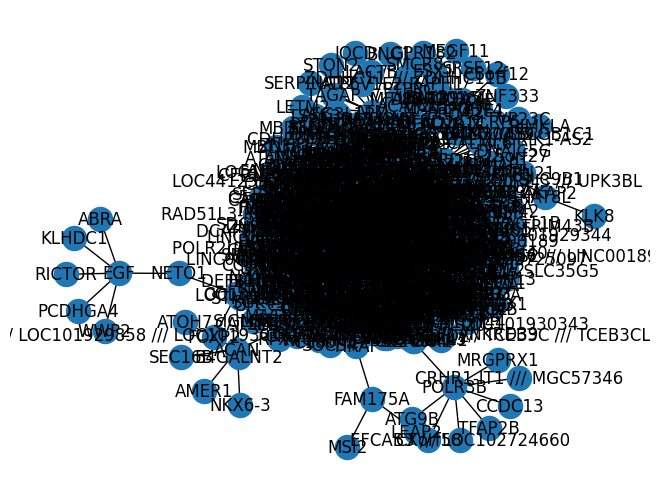

In [7]:
G= nx.Graph()


G.add_nodes_from(characters)
G.add_edges_from(edges)
pos = nx.circular_layout(G)

nx.draw_kamada_kawai(G, with_labels = True)

In [22]:
#Animation type graph

from pyvis.network import Network
net=Network(notebook="True")
net.from_nx(G)
net.show("example.html")

example.html


# Graph Analysis

In [8]:
G.degree('CYP2A6')

1

In [9]:
#Average Shortest path:

components = nx.connected_components(G)
for c in components:
    subgraph = G.subgraph(c)
    avg_shortest_path = nx.average_shortest_path_length(subgraph)
    print(f"Component: {c}, Avg. Shortest Path Length: {avg_shortest_path}")

Component: {'YWHAQ', 'DDR1 /// MIR4640'}, Avg. Shortest Path Length: 1.0
Component: {'HSPA6', 'RFC2', 'RAF1'}, Avg. Shortest Path Length: 1.3333333333333333
Component: {'PAX8', 'NRAS', 'MIR5193 /// UBA7', 'GUCA1A'}, Avg. Shortest Path Length: 1.5
Component: {'MAPK1', 'RAPGEF2', 'CCL5', 'FLJ45513 /// TAC4', 'ADAM32', 'C18orf12', 'PTPN21', 'CYP2E1', 'ZIM3', 'BCL2L11', 'DAOA-AS1', 'GPR115', 'TIGD1', 'NOX5', 'LINC00152 /// LOC101930489', 'THRA', 'DEFB119', 'SPATA17', 'MAP2K1', 'WFDC2', 'ALKBH5', 'SUOX', 'KLHL4', 'GPR126', 'GPR156'}, Avg. Shortest Path Length: 2.993333333333333
Component: {'EPHB3', 'TTLL12', 'ESRRA', 'MAP2K2', 'CYP2A6', 'SCARB1'}, Avg. Shortest Path Length: 1.6666666666666667
Component: {'SLC39A5', 'PXK', 'ARSG', 'ZDHHC11 /// ZDHHC11B', 'MSANTD3', 'TIMD4', 'IQGAP1', 'ATP6V1E2', 'VPS18', 'SRCAP', 'PRR22', 'MAP3K6', 'ZNF101', 'AFG3L1P', 'KRAS', 'SLC46A1'}, Avg. Shortest Path Length: 2.65
Component: {'MFAP3', 'RAX2', 'RIMKLA', 'TMEM196', 'BRAF', 'BEST4', 'TNFRSF10A', 'AK9', 'T

In [10]:
#Degree centrality for unweighted graph

degree_centrality = nx.degree_centrality(G)
degree_centrality


{'YWHAQ': 0.0009689922480620155,
 'RAF1': 0.001937984496124031,
 'NRAS': 0.0029069767441860465,
 'MAPK1': 0.0048449612403100775,
 'MAP2K2': 0.0048449612403100775,
 'MAP2K1': 0.0048449612403100775,
 'KRAS': 0.00872093023255814,
 'IQGAP1': 0.005813953488372093,
 'HRAS': 0.013565891472868217,
 'BRAF': 0.00872093023255814,
 'RIMKLA': 0.0009689922480620155,
 'NAT8L': 0.001937984496124031,
 'KLK3': 0.0009689922480620155,
 'FOLH1': 0.0048449612403100775,
 'FLNA': 0.0009689922480620155,
 'ASPA': 0.0029069767441860465,
 'ALB': 0.009689922480620155,
 'TP53': 0.01065891472868217,
 'RBBP8': 0.0009689922480620155,
 'RAD51': 0.0029069767441860465,
 'FAM175A': 0.0029069767441860465,
 'CSTF1': 0.0009689922480620155,
 'BRCC3': 0.0029069767441860465,
 'BRCA2': 0.011627906976744186,
 'BRCA1': 0.01937984496124031,
 'BARD1': 0.026162790697674417,
 'PALB2': 0.003875968992248062,
 'FANCI': 0.001937984496124031,
 'FANCG': 0.0029069767441860465,
 'FANCD2': 0.00872093023255814,
 'ATM': 0.014534883720930232,
 'T

In [11]:
#closeness centrality
closeness_centrality = nx.closeness_centrality(G)
closeness_centrality



{'YWHAQ': 0.0009689922480620155,
 'RAF1': 0.001937984496124031,
 'NRAS': 0.0029069767441860465,
 'MAPK1': 0.007751937984496124,
 'MAP2K2': 0.0048449612403100775,
 'MAP2K1': 0.009791921664626682,
 'KRAS': 0.00838550983899821,
 'IQGAP1': 0.0068132267441860465,
 'HRAS': 0.012359221880941934,
 'BRAF': 0.011491908064735481,
 'RIMKLA': 0.006485532274157648,
 'NAT8L': 0.006616553128181036,
 'KLK3': 0.002325581395348837,
 'FOLH1': 0.0049833887043189366,
 'FLNA': 0.0009689922480620155,
 'ASPA': 0.0029069767441860465,
 'ALB': 0.009689922480620155,
 'TP53': 0.01065891472868217,
 'RBBP8': 0.0009689922480620155,
 'RAD51': 0.0029069767441860465,
 'FAM175A': 0.007950705625124229,
 'CSTF1': 0.001722652885443583,
 'BRCC3': 0.0031007751937984496,
 'BRCA2': 0.013251176041873716,
 'BRCA1': 0.018679368637340057,
 'BARD1': 0.018452619620422345,
 'PALB2': 0.003875968992248062,
 'FANCI': 0.001937984496124031,
 'FANCG': 0.0029069767441860465,
 'FANCD2': 0.00872093023255814,
 'ATM': 0.013353924418604652,
 'TOPB

In [12]:
#Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G)
betweenness_centrality


{'YWHAQ': 0.0,
 'RAF1': 1.8797133813036189e-06,
 'NRAS': 5.639140143910856e-06,
 'MAPK1': 0.00016165535079211123,
 'MAP2K2': 1.879713381303619e-05,
 'MAP2K1': 0.00027443815367032837,
 'KRAS': 0.00015789592402950397,
 'IQGAP1': 0.00011278280287821714,
 'HRAS': 0.00046428920518199384,
 'BRAF': 0.00040225866359897445,
 'RIMKLA': 0.0,
 'NAT8L': 4.699283453259047e-05,
 'KLK3': 0.0,
 'FOLH1': 2.6315987338250666e-05,
 'FLNA': 0.0,
 'ASPA': 5.639140143910856e-06,
 'ALB': 8.458710215866284e-05,
 'TP53': 0.00010338423597169903,
 'RBBP8': 0.0,
 'RAD51': 5.639140143910856e-06,
 'FAM175A': 0.00014473793036037864,
 'CSTF1': 0.0,
 'BRCC3': 9.398566906518095e-06,
 'BRCA2': 0.0006494409732404003,
 'BRCA1': 0.0012359115482071293,
 'BARD1': 0.001637230355115452,
 'PALB2': 1.1278280287821713e-05,
 'FANCI': 1.8797133813036189e-06,
 'FANCG': 5.639140143910856e-06,
 'FANCD2': 6.766968172693028e-05,
 'ATM': 0.0009079015631696479,
 'TOPBP1': 0.0,
 'NBN': 5.639140143910856e-06,
 'BRIP1': 1.1278280287821713e-05,

In [13]:
#Degree calculation

vk = dict(G.degree())
print(vk)
vk = list(vk.values())
#print('Degree', vk)


{'YWHAQ': 1, 'RAF1': 2, 'NRAS': 3, 'MAPK1': 5, 'MAP2K2': 5, 'MAP2K1': 5, 'KRAS': 9, 'IQGAP1': 6, 'HRAS': 14, 'BRAF': 9, 'RIMKLA': 1, 'NAT8L': 2, 'KLK3': 1, 'FOLH1': 5, 'FLNA': 1, 'ASPA': 3, 'ALB': 10, 'TP53': 11, 'RBBP8': 1, 'RAD51': 3, 'FAM175A': 3, 'CSTF1': 1, 'BRCC3': 3, 'BRCA2': 12, 'BRCA1': 20, 'BARD1': 27, 'PALB2': 4, 'FANCI': 2, 'FANCG': 3, 'FANCD2': 9, 'ATM': 15, 'TOPBP1': 1, 'NBN': 3, 'BRIP1': 4, 'BABAM1': 5, 'PDCD1LG2': 1, 'PDCD1': 2, 'HOXD13': 2, 'HLA-DRA': 3, 'CTLA4': 3, 'CD80': 4, 'CD4': 5, 'CD3E': 6, 'CD274': 8, 'CD247': 6, 'PIK3R3': 1, 'PIK3R2': 2, 'PIK3R1': 3, 'PIK3CA': 4, 'IRS1': 6, 'ERBB3': 7, 'EGFR': 13, 'AKT1': 8, 'NRG1': 1, 'HSP90AA1': 1, 'GRB7': 2, 'GRB2': 3, 'ERBB2IP': 4, 'ERBB2': 6, 'EGF': 6, 'CTNNB1': 6, 'CD44': 4, 'TIMP3': 1, 'TIMP2': 1, 'TIMP1': 2, 'THBS2': 2, 'TGFB1': 5, 'STAT3': 5, 'MMP2': 8, 'LCN2': 5, 'DCN': 10, 'COL18A1': 6, 'PLG': 3, 'MMP9': 4, 'MMP1': 6, 'IL6': 6, 'FGF2': 8, 'BSG': 5, 'ACAN': 5, 'SPARC': 1, 'PAPLN': 1, 'ERBB4': 1, 'COL3A1': 4, 'COL1A2'

In [14]:
df1 = pd.read_csv('graph_result.csv')
df1

,Node1,Node2,Degree,avgerage_shortest_path_length,betweenness_centrality,closeness_centrality,degree_centrality
0,YWHAQ,DDR1 /// MIR4640,1.0,1.000000,0.164633,0.184002,YWHAQ': 0.0004065040650406504
1,RAF1,RFC2,1.0,1.333333,0.126246,0.175872,'DDR1 /// MIR4640': 0.0004065040650406504
2,RAF1,HSPA6,2.0,1.333333,0.118381,0.174183,'RAF1': 0.0008130081300813008
3,NRAS,PAX8,1.0,2.993333,0.117223,0.171207,'RFC2': 0.0004065040650406504
4,NRAS,GUCA1A,1.0,1.666667,0.094716,0.168594,'HSPA6': 0.0004065040650406504
...,...,...,...,...,...,...,...
2861,RUNX1,FLJ38379,NaN,NaN,NaN,NaN,NaN
2862,RUNX1,LOC283485,NaN,NaN,NaN,NaN,NaN
2863,RUNX1,LOC283485,NaN,NaN,NaN,NaN,NaN
2864,RUNX1,LRRC52,NaN,NaN,NaN,NaN,NaN


In [15]:
df2=df1.fillna(0)
df2

,Node1,Node2,Degree,avgerage_shortest_path_length,betweenness_centrality,closeness_centrality,degree_centrality
0,YWHAQ,DDR1 /// MIR4640,1.0,1.000000,0.164633,0.184002,YWHAQ': 0.0004065040650406504
1,RAF1,RFC2,1.0,1.333333,0.126246,0.175872,'DDR1 /// MIR4640': 0.0004065040650406504
2,RAF1,HSPA6,2.0,1.333333,0.118381,0.174183,'RAF1': 0.0008130081300813008
3,NRAS,PAX8,1.0,2.993333,0.117223,0.171207,'RFC2': 0.0004065040650406504
4,NRAS,GUCA1A,1.0,1.666667,0.094716,0.168594,'HSPA6': 0.0004065040650406504
...,...,...,...,...,...,...,...
2861,RUNX1,FLJ38379,0.0,0.000000,0.000000,0.000000,0
2862,RUNX1,LOC283485,0.0,0.000000,0.000000,0.000000,0
2863,RUNX1,LOC283485,0.0,0.000000,0.000000,0.000000,0
2864,RUNX1,LRRC52,0.0,0.000000,0.000000,0.000000,0


In [16]:
df2.isnull()

,Node1,Node2,Degree,avgerage_shortest_path_length,betweenness_centrality,closeness_centrality,degree_centrality
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
2861,False,False,False,False,False,False,False
2862,False,False,False,False,False,False,False
2863,False,False,False,False,False,False,False
2864,False,False,False,False,False,False,False


# Support Vector Machine

In [17]:

# X -> features, y -> label
#here we will not use gender and user id
#on the basis of age and estimated salary we will decide the person will purchase the product or not
x=df2.iloc[:,[3]]# that's why in x we have 0th no column 
y=df2.iloc[:,2]#and in y we have column no 4 that we will predict means dependent variable

In [18]:
print(x.head())
#.head() is used to predict first five values

   avgerage_shortest_path_length
0                       1.000000
1                       1.333333
2                       1.333333
3                       2.993333
4                       1.666667


In [19]:
print(y.head())

0    1.0
1    1.0
2    2.0
3    1.0
4    1.0
Name: Degree , dtype: float64


In [20]:
#now devide or split the data for training and testing the set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)
#means 25% data will consider as test data and remaining data will consider as tarining data

In [21]:
#check the shape of traing and testing data
print(x_train.shape)
print(x_test.shape)
#means we will train our model in the basis of first 300 row of that 2 colummn age and estimated salary
#and we will test  our model in the basis of last remaining 100 row of that 2 colummn age and estimated salary

(2149, 1)
(717, 1)


In [22]:
#now scale or feature or preprocessing the data using standard sccaler we can use minmax scaler too for scalling the data
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.fit_transform(x_test)

In [23]:
#apply svm algo for classification
#by finding the right hyperplane that classifies the datapoint in the graph
from sklearn.svm import SVC
#in svm we have many kernal like linear,sigmoid,polynomial,rbf we usde here linear
classifier = SVC(kernel ='linear',random_state=0)
classifier.fit(x_train,y_train)#here we train pour alogorithm

SVC(kernel='linear', random_state=0)

In [24]:
y_pred=classifier.predict(x_test)
y_pred
#here we will have 100 data means y value for 100 x test values
#these are the predicted value in boolean format

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [25]:
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred )*100,"%")
print("F1 score:",metrics.f1_score(y_test, y_pred, average='weighted')*100,"%")
print("recall:",metrics.recall_score(y_test, y_pred, average='weighted')*100,"%")
print("precision:",metrics.precision_score(y_test, y_pred, average='micro')*100,"%")

Accuracy: 72.66387726638771 %
F1 score: 61.159741608704365 %
recall: 72.66387726638771 %
precision: 72.66387726638771 %


# Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier
x=df2.iloc[:,[3]]# that's why in x we have 0th no column 
y=df2.iloc[:,2]#and in y we have column no 4 that we will predict means dependent variable
  
    #now devide or split the data for training and testing the set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=28)

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred2 = dt.predict(x_test)
print(y_pred2)


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 3. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 3. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

In [28]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2 )*100,"%")
print("F1 score:",metrics.f1_score(y_test, y_pred2, average='macro')*100,"%")
print("recall:",metrics.recall_score(y_test, y_pred2, average='macro')*100,"%")
print("precision:",metrics.precision_score(y_test, y_pred2, average='micro')*100,"%")

Accuracy: 74.39024390243902 %
F1 score: 3.8818181818181814 %
recall: 4.524263615172706 %
precision: 74.39024390243902 %


# RandomForest

In [39]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

# Generate a synthetic dataset for classification
x, y = make_classification(n_samples=1000, n_features=10, random_state=42)#42

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)#42
# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)


print(f"Accuracy:", accuracy*100)
print("F1 score:",metrics.f1_score(y_test, y_pred, average='macro')*100,"%")
print("recall:",metrics.recall_score(y_test, y_pred, average='macro')*100,"%")
print("precision:",metrics.precision_score(y_test, y_pred, average='micro')*100,"%")



Accuracy: 88.0
F1 score: 87.92270531400966 %
recall: 88.18706346796235 %
precision: 88.0 %


In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error

# Generate a synthetic dataset for regression
x, y = make_regression(n_samples=1000, n_features=10, random_state=42)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a Random Forest regressor
reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the regressor
reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = reg.predict(X_test)

# Evaluate the mean squared error of the regressor
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 3217.8878189246975


In [ ]:
'''

from sklearn.tree import DecisionTreeClassifier
x=df2.iloc[:,[3]]# that's why in x we have 0th no column 
y=df2.iloc[:,2]#and in y we have column no 4 that we will predict means dependent variable
  
    #now devide or split the data for training and testing the set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=28)

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred2 = dt.predict(x_test)
print(y_pred2)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred2 )*100,"%")

print("Accuracy:",metrics.accuracy_score(y_test, y_pred )*100,"%")
''